# Fragrance clustering

# Table of contents

1. Data exploration
2. Choosing the right number of clusters <br>
   2.1. Elbow method <br>
   2.2. Silhouette coefficient <br>
3. Four fragrance clusters
4. Six fragrance clusters
5. Ten fragrance clusters
6. Most popular fragrances

## Objective

Fragrances will be grouped into clusters. Objects in the same cluster should be more similar to each other than to objects in other clusters.

We will define the main scent family for each fragrance. To do this, different approaches based on business rules will be used.

## 1. Data exploration

In [1]:
# import Python libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# open the csv file
df = pd.read_csv('perfume.csv')
pd.options.display.max_columns = None
df.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [3]:
# display all columns
my_list = list(df)
my_list

['brand',
 'title',
 'date',
 'accords',
 'rating_score',
 'votes',
 'longevity_poor',
 'longevity_weak',
 'longevity_moderate',
 'longevity_long',
 'longevity_very_long',
 'sillage_soft',
 'sillage_moderate',
 'sillage_heavy',
 'sillage_enormous',
 'clslove',
 'clslike',
 'clsdislike',
 'clswinter',
 'clsspring',
 'clssummer',
 'clsautumn',
 'clscold',
 'clshot',
 'clsday',
 'clsnight',
 'clslove_female25under',
 'clslove_male25under',
 'clslove_female25older',
 'clslove_male25older',
 'clslike_female25under',
 'clslike_male25under',
 'clslike_female25older',
 'clslike_male25older',
 'clsdislike_female25under',
 'clsdislike_male25under',
 'clsdislike_female25older',
 'clsdislike_male25older',
 'clswinter_female25under',
 'clswinter_male25under',
 'clswinter_female25older',
 'clswinter_male25older',
 'clsspring_female25under',
 'clsspring_male25under',
 'clsspring_female25older',
 'clsspring_male25older',
 'clssummer_female25under',
 'clssummer_male25under',
 'clssummer_female25older',

In [4]:
# select columns for further analysis
df1 = df[['brand', 'title', 'date', 'gender', 'votes', 'rating_score', 'accords']]
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


Each observations is a unique scent.

Categorical:
- <b> brand </b> - name of the brand
- <b> title </b>  - name of the fragrance
- <b> date </b> - release date (In YYYY format)
- <b> gender </b> - gender (women, man, unisex)
- <b> accords </b> - top notes

Numerical:
- <b> votes </b> - number of votes cast for a scent
- <b> rating_score </b> - fragrance rating

In [5]:
# basic characteristics
df1.describe()

,date,votes,rating_score
count,51212.000000,51212.000000,51212.000000
mean,1526.492775,86.440522,3.192377
std,867.219020,362.674407,1.630846
min,0.000000,0.000000,0.000000
25%,1900.000000,2.000000,3.000000
50%,2009.000000,9.000000,3.860000
75%,2015.000000,42.000000,4.200000
max,9459.000000,11188.000000,5.000000


In [6]:
# find length of longest string in Pandas dataframe
df1['accords'].str.len().max()
# set column width in dataframe
pd.options.display.max_colwidth = 76

In [7]:
# show the first 5 rows
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


In [8]:
# show the last 5 rows
df1.tail()

,brand,title,date,gender,votes,rating_score,accords
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,5,3.67,"balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,1,0.00,"woody,musky,aromatic,amber,white floral,citrus,Pictures"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,0,0.00,"aromatic,green,citrus,woody,fresh spicy,amber,Pictures"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,1,0.00,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,1,0.00,"floral,citrus,fresh,aromatic,patchouli,musky,Pictures"


In [9]:
# group by gender
df1['gender'].value_counts()

women     39761
man         850
unisex      122
Name: gender, dtype: int64

In [10]:
# count all rows
df1['gender'].count()

40733

In [11]:
# include only fragrances for women
df1 = df1.loc[df1['gender']=='women']
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


In [12]:
# group by rating_score
df1['rating_score'].value_counts().head(20)

0.00    7169
4.00    3679
5.00    2469
4.50    1394
3.00     702
4.33     697
4.67     586
1.00     573
3.67     482
4.25     442
3.50     429
3.75     404
3.33     393
2.50     374
4.20     350
3.83     301
4.17     300
3.80     295
4.75     289
3.88     263
Name: rating_score, dtype: int64

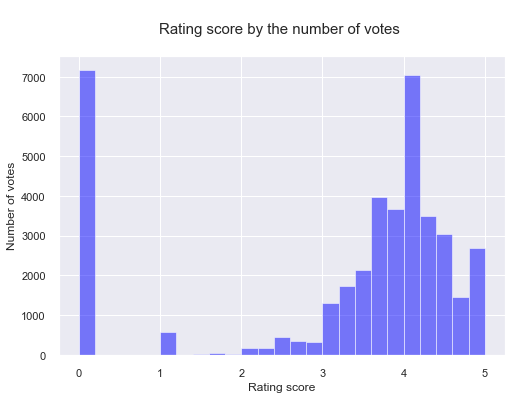

In [13]:
# plot a histogram with the rating score in bins
sc = df1['rating_score']
plt.hist(sc, 25, facecolor='blue', alpha=0.5)
plt.title('\nRating score by the number of votes \n', fontsize=15)
plt.xlabel('Rating score')
plt.ylabel('Number of votes')
plt.show()

In [14]:
# group by date
df1['date'].value_counts().head(20)

0       9357
2017    2628
2016    2624
2015    2547
2018    2543
2014    2158
2013    1820
2012    1755
2010    1512
2011    1463
2019    1364
2008    1068
2009    1059
2007     827
2000     806
2006     663
2005     488
2004     376
2003     373
2002     249
Name: date, dtype: int64

In [15]:
# display top 10 brands
df1['brand'].value_counts().head(10)

Avon                 584
Guerlain             333
Demeter-Fragrance    322
Victoria-s-Secret    301
DSH-Perfumes         248
Alkemia-Perfumes     218
Ajmal                211
O-Botic-rio          207
Oriflame             206
Yves-Rocher          198
Name: brand, dtype: int64

In [16]:
# display the most popular fragrances
df1.sort_values('votes', ascending=False).head(20)

,brand,title,date,gender,votes,rating_score,accords
9762,Mugler,Angel Mugler for women,1992,women,11188,3.15,"sweet,patchouli,warm spicy,fruity,caramel,cacao,Videos,Pictures"
8141,Mugler,Alien Mugler for women,2005,women,10435,3.81,"white floral,amber,woody,animalic,balsamic,Videos,Pictures"
26082,Chanel,Coco Mademoiselle Chanel for women,2001,women,10349,4.08,"citrus,patchouli,white floral,sweet,rose,balsamic,Videos,Pictures"
20025,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,women,10008,3.64,"citrus,woody,green,fresh,fruity,Videos,Pictures"
43773,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,women,9771,3.95,"vanilla,almond,sweet,nutty,fruity,Videos,Pictures"
3108,Christian-Dior,J'adore Christian Dior for women,1999,women,8689,3.64,"floral,fruity,white floral,sweet,aquatic,Videos,Pictures"
4939,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,women,8573,3.72,"floral,patchouli,white floral,green,citrus,Videos,Pictures"
37269,Calvin-Klein,Euphoria Calvin Klein for women,2005,women,8161,3.68,"woody,floral,powdery,sweet,amber,fruity,Videos,Pictures"
15091,Tom-Ford,Black Orchid Tom Ford for women,1,women,8128,3.77,"warm spicy,sweet,earthy,balsamic,cacao,Pictures"
34181,Lolita-Lempicka,Lolita Lempicka Lolita Lempicka for women,1997,women,8096,3.80,"sweet,soft spicy,powdery,floral,woody,Videos,Pictures"


### Accord of a perfume

An accord is a combination of several notes (e.g. rose, chypre, amber). 

Fragrances can be classified into one various types, although there is a lot of overlap. Most scents contain notes from more than one family. 

The most dominant notes in the fragrance determines the scent category.

The floral fragrance family 
- Fruity: Sweet, edible and tropical like peach, pear and apple.
- Floral: Smells like fresh-cut flowers — imagine rose and lily.
- Soft floral: Soft, powdery and sweet with a hint of creamy.
- Floral oriental: Florals with subtle spice notes.

The oriental fragrance family
- Soft oriental: Soft, floral notes mix with incense and warm spices.
- Oriental: Sweet, warm notes like cinnamon, vanilla and musk.
- Woody oriental: Earthy notes like patchouli and sandalwood mixed with spicy and sweet notes.

The woody fragrance family:
- Woods: Aromatic scents like cedarwood, sandalwood and vetiver.
- Mossy woods: Sweet, smooth and earthy scents like oakmoss and amber.
- Dry woods: Smouldering and smoky mixed with leather aromas.

The fresh fragrance family:
- Aromatic: Clean and fresh herbs mixed with lavender or woody scents.
- Citrus: Zesty or tangy notes like mandarins or bergamot.
- Water: Aquatic scents that smell of sea spray or rain mixed with or oceanic notes.
- Green: Smells of freshly mowed lawns and crushed green leaves.

In [17]:
# split accords column into separate columns
df2 = df1['accords'].str.split(",", n = 6, expand = True)
df2.tail()

,0,1,2,3,4,5,6
51206,woody,green,citrus,warm spicy,aromatic,Pictures,None
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures
51210,warm spicy,woody,citrus,fruity,sweet,None,None
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures


In [18]:
# create new accords_ clean column by extracting top five accords
df2['accords_'] = df2[df2.columns[0:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df2.tail()

,0,1,2,3,4,5,6,accords_
51206,woody,green,citrus,warm spicy,aromatic,Pictures,None,"woody,green,citrus,warm spicy,aromatic"
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures,"woody,musky,aromatic,amber,white floral"
51210,warm spicy,woody,citrus,fruity,sweet,None,None,"warm spicy,woody,citrus,fruity,sweet"
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures,"floral,citrus,fresh,aromatic,patchouli"


In [19]:
# merge two dataframes by index
result = df1.join(df2)
result = result[['brand', 'title', 'date', 'gender','rating_score','votes','accords_']]
result.tail()

,brand,title,date,gender,rating_score,votes,accords_
51206,Cottoncake,Soft Sencha Cottoncake for women and men,2018,women,0.00,1,"woody,green,citrus,warm spicy,aromatic"
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,3.67,5,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,0.00,1,"woody,musky,aromatic,amber,white floral"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,0.00,1,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,0.00,1,"floral,citrus,fresh,aromatic,patchouli"


## 2. Choosing the right number of clusters

In [20]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(result['accords_'].values.astype('U'))

### 2.1. Elbow method

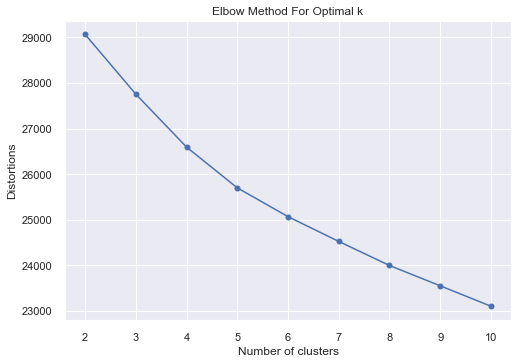

In [21]:
# elbow method for K means
# the chart is quite smooth, it does not have a distinct elbow
distortions = []

for i in range(2,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

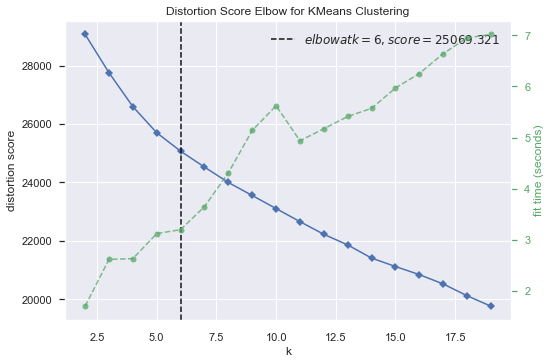

In [22]:
# elbow method for K means
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(X)         
visualizer.poof(); 

### 2.2. Silhouette coefficient

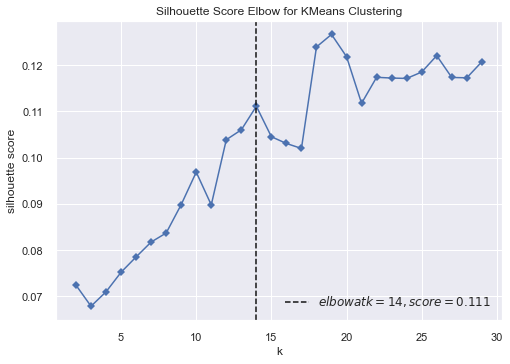

In [23]:
# silhouette score for K means
# k=10 is a local optimum, whereas k=14 or k=19 could also be chosen for the number of clusters
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= False)
visualizer.fit(X)      
visualizer.poof();  

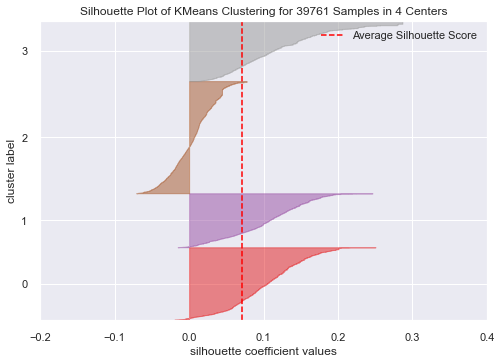

In [24]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

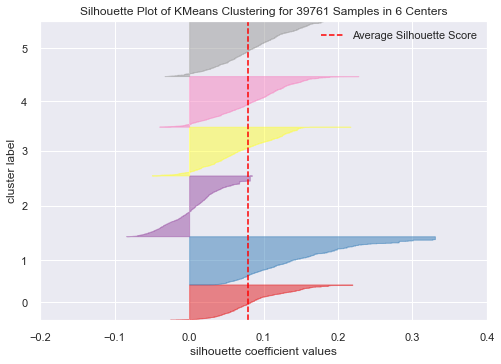

In [25]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

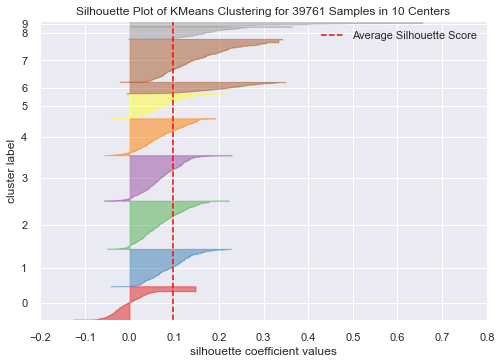

In [26]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

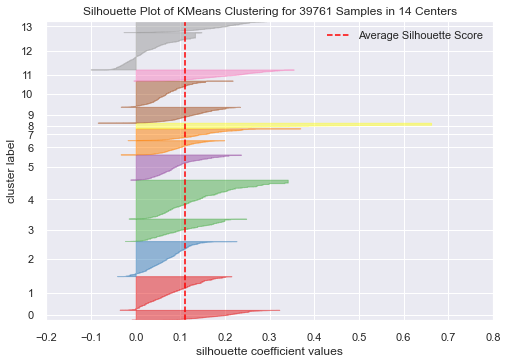

In [27]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

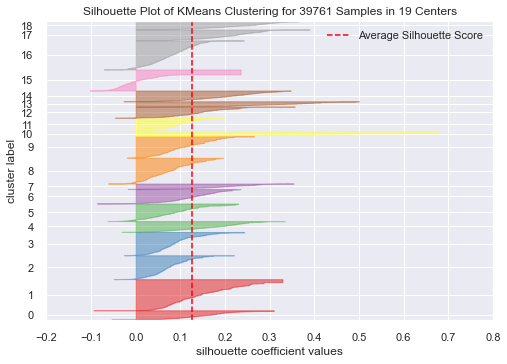

In [28]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=19, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

## 3. Four fragrance clusters

In [29]:
# cluster fragrances
model4 = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10)
model4.fit(X)

KMeans(max_iter=200, n_clusters=4)

In [30]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model4.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,4):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fruity sweet powdery woody floral musky vanilla rose citrus
Cluster 1: floral white citrus sweet woody fruity powdery musky animalic
Cluster 2: warm spicy balsamic woody fresh patchouli amber aromatic floral
Cluster 3: fresh aromatic spicy green citrus woody floral herbal balsamic


Cluster 0 - the Woody family <br>
Cluster 1 - the Floral family <br>
Cluster 2 - the Oriental family <br>
Cluster 3 - the Fresh family <br>

In [49]:
# add a column with the cluster assignment
result2=result.copy()
result2['cluster4'] = model4.labels_
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2


In [50]:
# ordinal features mapping
cluster_mapping4 = {
    0: 'Woody',
    1: 'Floral',
    2: 'Oriental',
    3: 'Fresh'}

result2['cluster_name4'] = result2['cluster4'].map(cluster_mapping4)
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0,Woody
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0,Woody
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0,Woody
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1,Floral
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3,Fresh
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3,Fresh
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental


In [51]:
# cluster count
result2['cluster_name4'].value_counts()

Woody       15010
Floral       9709
Fresh        7854
Oriental     7188
Name: cluster_name4, dtype: int64

## 4. Six fragrance clusters

In [37]:
# cluster fragrances
model6 = KMeans(n_clusters=6, init='k-means++', max_iter=200, n_init=10)
model6.fit(X)

KMeans(max_iter=200, n_clusters=6)

In [38]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model6.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,6):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fruity sweet floral woody citrus fresh vanilla powdery tropical
Cluster 1: warm spicy balsamic woody patchouli amber aromatic floral fresh
Cluster 2: rose floral citrus woody musky fruity powdery fresh white
Cluster 3: fresh aromatic spicy citrus green woody floral herbal balsamic
Cluster 4: floral white citrus woody sweet powdery animalic musky green
Cluster 5: powdery woody balsamic musky floral vanilla amber sweet citrus


Cluster 0 - the Fruity family <br>
Cluster 1 - the Oriental family <br>
Cluster 2 - the Floral family <br>
Cluster 3 - the Fresh family <br>
Cluster 4 - the Citrus family <br>
Cluster 5 - the Woody family <br>

In [52]:
# add a column with the cluster assignment
result2['cluster6'] = model6.labels_
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0,Woody,5
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0,Woody,2
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0,Woody,2
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1,Floral,4
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,1
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3,Fresh,3
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental,2
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3,Fresh,3
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental,1
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental,1


In [53]:
# ordinal features mapping
cluster_mapping6 = {
    0: 'Fruity',
    1: 'Oriental',
    2: 'Floral',
    3: 'Fresh',
    4: 'Citrus',
    5: 'Woody'}

result2['cluster_name6'] = result2['cluster6'].map(cluster_mapping6)
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0,Woody,5,Woody
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0,Woody,2,Floral
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0,Woody,2,Floral
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1,Floral,4,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,1,Oriental
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3,Fresh,3,Fresh
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental,2,Floral
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3,Fresh,3,Fresh
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental,1,Oriental
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental,1,Oriental


In [54]:
# cluster count
result2['cluster_name6'].value_counts()

Woody       8119
Citrus      7357
Oriental    6708
Fruity      6487
Fresh       6398
Floral      4692
Name: cluster_name6, dtype: int64

## 5. Ten fragrance clusters

In [42]:
# cluster fragrances
model10 = KMeans(n_clusters=10, init='k-means++', max_iter=200, n_init=10)
model10.fit(X)

KMeans(max_iter=200, n_clusters=10)

In [43]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model10.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,10):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: yellow floral sweet white woody powdery green citrus musky
Cluster 1: balsamic musky woody pictures amber sweet rose vanilla aromatic
Cluster 2: fresh spicy aromatic citrus woody floral balsamic herbal musky
Cluster 3: warm spicy balsamic woody patchouli powdery floral amber sweet
Cluster 4: fruity sweet floral tropical citrus fresh woody rose sour
Cluster 5: powdery woody floral vanilla sweet fruity musky balsamic citrus
Cluster 6: floral white citrus woody sweet fruity musky rose powdery
Cluster 7: green fresh aromatic citrus spicy woody floral fruity white
Cluster 8: animalic floral white amber leather tuberose musky woody balsamic
Cluster 9: aquatic ozonic floral fresh fruity green citrus woody white


Cluster 0 - the Floral family <br>
Cluster 1 - the Spicy family <br>
Cluster 2 - the Fresh family <br>
Cluster 3 - the Oriental family <br>
Cluster 4 - the Gourmand family <br>
Cluster 5 - the Woody family <br>
Cluster 6 - the Citrus family <br>
Cluster 7 - the Green family <br>
Cluster 8 - the Animalic family <br>
Cluster 9 - the Aquatic family <br>

In [56]:
# add a column with the cluster assignment
result2['cluster10'] = model10.labels_
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster10
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0,Woody,5,Woody,8
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0,Woody,2,Floral,2
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0,Woody,2,Floral,1
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1,Floral,4,Citrus,8
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,1,Oriental,3
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3,Fresh,3,Fresh,2
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental,2,Floral,2
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3,Fresh,3,Fresh,7
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental,1,Oriental,3
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental,1,Oriental,2


In [57]:
# ordinal features mapping
cluster_mapping10 = {
    0: 'Floral',
    1: 'Spicy',
    2: 'Fresh',
    3: 'Oriental',
    4: 'Gourmand',
    5: 'Woody',
    6: 'Citrus',
    7: 'Green',
    8: 'Animalic',
    9: 'Aquatic'}

result2['cluster_name10'] = result2['cluster10'].map(cluster_mapping10)
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster10,cluster_name10
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",0,Woody,5,Woody,8,Animalic
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",0,Woody,2,Floral,2,Fresh
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",0,Woody,2,Floral,1,Spicy
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",1,Floral,4,Citrus,8,Animalic
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,1,Oriental,3,Oriental
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",3,Fresh,3,Fresh,2,Fresh
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental,2,Floral,2,Fresh
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",3,Fresh,3,Fresh,7,Green
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental,1,Oriental,3,Oriental
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental,1,Oriental,2,Fresh


## 6. Most popular fragrances

In [58]:
result2.sort_values('votes', ascending=False).head(20)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster10,cluster_name10
9762,Mugler,Angel Mugler for women,1992,women,3.15,11188,"sweet,patchouli,warm spicy,fruity,caramel",2,Oriental,1,Oriental,3,Oriental
8141,Mugler,Alien Mugler for women,2005,women,3.81,10435,"white floral,amber,woody,animalic,balsamic",1,Floral,4,Citrus,8,Animalic
26082,Chanel,Coco Mademoiselle Chanel for women,2001,women,4.08,10349,"citrus,patchouli,white floral,sweet,rose",1,Floral,2,Floral,6,Citrus
20025,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,women,3.64,10008,"citrus,woody,green,fresh,fruity",3,Fresh,3,Fresh,7,Green
43773,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,women,3.95,9771,"vanilla,almond,sweet,nutty,fruity",0,Woody,0,Fruity,4,Gourmand
3108,Christian-Dior,J'adore Christian Dior for women,1999,women,3.64,8689,"floral,fruity,white floral,sweet,aquatic",1,Floral,0,Fruity,9,Aquatic
4939,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,women,3.72,8573,"floral,patchouli,white floral,green,citrus",1,Floral,4,Citrus,6,Citrus
37269,Calvin-Klein,Euphoria Calvin Klein for women,2005,women,3.68,8161,"woody,floral,powdery,sweet,amber",0,Woody,5,Woody,5,Woody
15091,Tom-Ford,Black Orchid Tom Ford for women,1,women,3.77,8128,"warm spicy,sweet,earthy,balsamic,cacao",2,Oriental,1,Oriental,3,Oriental
34181,Lolita-Lempicka,Lolita Lempicka Lolita Lempicka for women,1997,women,3.80,8096,"sweet,soft spicy,powdery,floral,woody",0,Woody,5,Woody,5,Woody


In [59]:
# save results to a csv file
result2.to_csv('result2.csv')